# COVID-19 Auswertung - new cases, deaths, Intensivstationen
## DIVI und WHO Daten - Deutschland und einige Nachbarn


In [102]:
# import libraries
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots

# performance
from datetime import datetime
from datetime import date # todays date

import os
now = datetime.now()

## Dataframes definieren

In [103]:
# Webabruf - CSV einlesen
data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
#gleitender Mittelwert der cases und deaths, 7 Tage
data['MA'] = data['New_cases'].rolling(window=7,min_periods=1).mean()
data['MA_deaths'] = data['New_deaths'].rolling(window=7, min_periods=1).mean()

# Lokal - CSV einlesen
df = pd.read_csv("D:\Github\Covid-19-Auswertung-WHO-DIVI\data-WvhXR.csv")

In [104]:
# Date_reported in eine Datumsspalte umwandeln
data['Date_reported'] = pd.to_datetime(data.Date_reported)

#Timestamp definieren  YYYY-MM-DD
ts = pd.to_datetime('2020-9-01')

#dataframe reduzieren 
data = data.loc[data.Date_reported >= ts, :]

In [105]:
# Länder definieren
ger = data[data.Country == 'Germany']
fr = data[data.Country == 'France']
at = data[data.Country == 'Austria']
pl = data[data.Country == 'Poland']
cz = data[data.Country == 'Czechia']
ch = data[data.Country == 'Switzerland']
it = data[data.Country == 'Italy']  # 22.11.2020
es = data[data.Country == 'Spain']  # 22.11.2020
gb = data[data.Country == 'The United Kingdom']  # 22.11.2020
se = data[data.Country == 'Sweden'] # 22.11.2020

## Variablen für die Plots definieren

In [106]:
# Variablen Definition für Plots

# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 28

# Einwohnerzahlen
E_fr = 66012908
E_pl = 38659927
E_ger = 81504947
E_cz = 10586651
E_at = 8902600
E_ch = 8847020

# Bezugsgröße Einwohner
pE = 100000

# Heutiges Datum und formatieren dd.mm.YYYY
today = date.today().strftime("%d.%m.%Y")

## Visualisierung Plots
### Todesfälle 7 Tage Mittelwert 

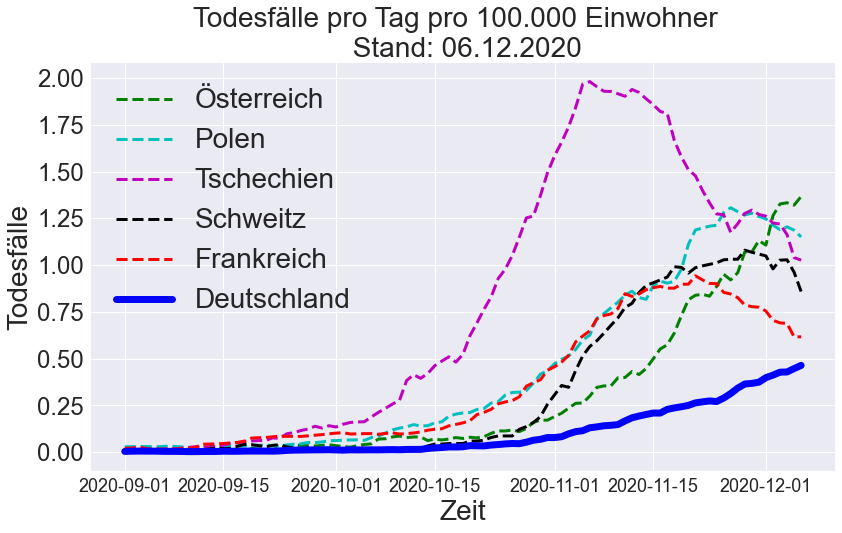

In [107]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.2,9/1.2))

plt.style.use('seaborn')
plt.grid(True)

# Todesfälle pro 100.000 Einwohner 02.12.2020
plt.plot(at.Date_reported,at['MA_deaths'] * (pE/E_at), 'g--', linewidth = lws)
plt.plot(pl.Date_reported,pl['MA_deaths'] * (pE/E_pl), 'c--', linewidth = lws)
plt.plot(cz.Date_reported,cz['MA_deaths'] * (pE/E_cz), 'm--', linewidth = lws)
plt.plot(ch.Date_reported,ch['MA_deaths'] * (pE/E_ch), 'k--', linewidth = lws)
plt.plot(fr.Date_reported,fr['MA_deaths'] * (pE/E_fr), 'r--', linewidth = lws)
plt.plot(ger.Date_reported,ger['MA_deaths'] * (pE/E_ger), 'b-', linewidth = lwb)


# Legende 
plt.legend(['Österreich', 'Polen', 'Tschechien','Schweitz', 'Frankreich',  'Deutschland'], fontsize=size)


# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10)
plt.yticks(fontsize=size -4)

# plt.xticks([])
plt.ylabel('Todesfälle', fontsize=size)



plt.title('Todesfälle pro Tag pro 100.000 Einwohner  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_deaths.jpg', dpi = 150)


### Neue Fälle 7 Tage Mittelwert 

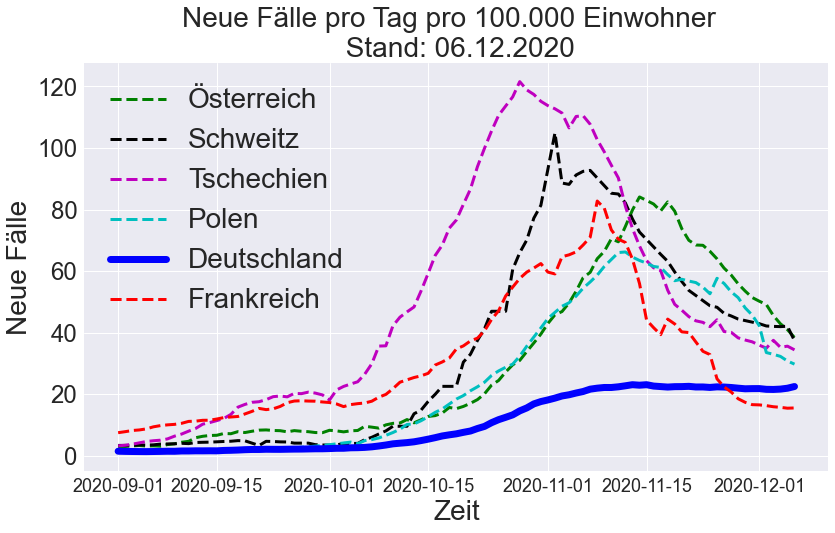

In [108]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.2,9/1.2))


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 
plt.plot(at.Date_reported,at['MA']* (pE/E_at), 'g--', linewidth = lws)
plt.plot(ch.Date_reported,ch['MA']* (pE/E_ch), 'k--', linewidth = lws)
plt.plot(cz.Date_reported,cz['MA']* (pE/E_cz), 'm--', linewidth = lws)
plt.plot(pl.Date_reported,pl['MA']* (pE/E_pl), 'c--', linewidth = lws)
plt.plot(ger.Date_reported,ger['MA']* (pE/E_ger), 'b-', linewidth = lwb)
plt.plot(fr.Date_reported,fr['MA']* (pE/E_fr), 'r--', linewidth = lws)

plt.legend(['Österreich', 'Schweitz', 'Tschechien', 'Polen', 'Deutschland', 'Frankreich'], fontsize=size)


# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10)
plt.yticks(fontsize=size -4)

# plt.xticks([])
plt.ylabel('Neue Fälle', fontsize=size)
plt.title('Neue Fälle pro Tag pro 100.000 Einwohner  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_cases.jpg', dpi = 150)

### Intensivstationen DIVI

In [109]:
# Date_reported in eine Datumsspalte umwandeln
df['date'] = pd.to_datetime(df.date)

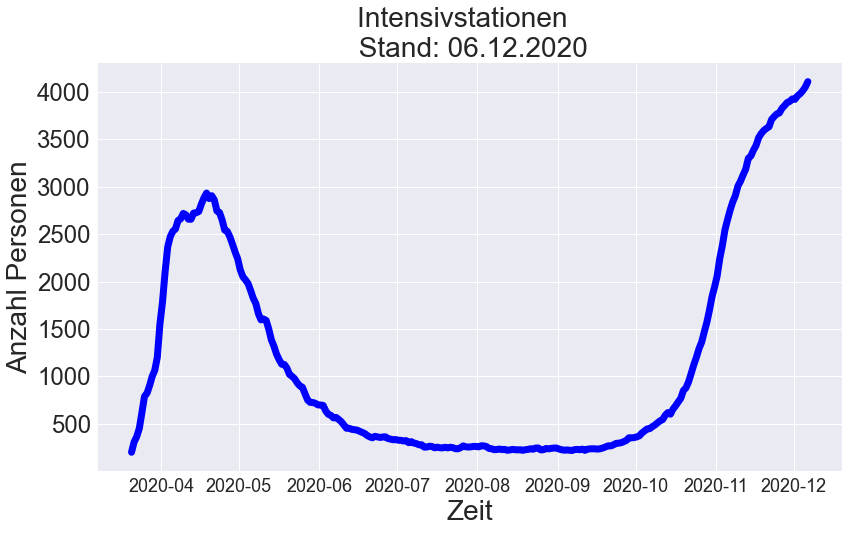

In [110]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.2,9/1.2))

plt.style.use('seaborn')
plt.grid(True)
plt.plot(df.date,df['COVID-19-Fälle'], 'b-', linewidth = lwb)
#plt.legend(["Intensivstationen"], fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10)
plt.yticks(fontsize=size -4)

# plt.xticks([])
plt.ylabel('Anzahl Personen', fontsize=size)
plt.title('Intensivstationen  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_intensiv.jpg', dpi = 150)

## Performance messen

In [111]:
#performance
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()
print(f'performance {pc} = {now2-now} seconds')

performance DOUG = 0:00:01.486451 seconds
